In [1]:
# Assume the one CSV file containing the training&testing datasets is stored in the current working directory 
import pandas as pd
from sklearn.model_selection import train_test_split

# we can do data pre-processing with pandas or build it into the pieline for hyper-parameter tuning 
df = pd.read_csv('ks-projects-201801.csv', engine='python') # load the dataset
df

# some explanation for the features
# 'pledged' is the pledged amount in the project currency (GPB for a project created in GBP for example)
# 'usd_pledged' is the USD conversion made by KickStarter for the previous pledged value
# 'usd_pledged_real' is the USD conversion made by fixer.io api (since KickStarter conversion is verified to be inaccurate by the dataset creator and the other data scientists)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Some explanation for the Features in the Dataset
The dataset has 15 features. Features like name, currency, deadline, launched date and country are self-explanatory, while the other features may need some more explanations as follows:

Main_Category: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.

Category: Main Categories are further divided into categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

Goal: This is the goal amount which the company need to raise to start its project. The goal amount is important variable for company as if it is too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach its goal soon and backers may not be interested to pledge more.

Pledged: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any fund. If pledged amount is more than the goal, the company is considered successful. The variable “usd pledged” is amount of money raised in US dollars.

Number of Backers: These are number of people who have supported the project by pledging some amount.

#  Initial Dataset Exploration

In [2]:
# Main_Category: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.
print('Number of Main_Category: ', len(df.main_category.unique()))
print(df.main_category.value_counts())


Number of Main_Category:  15
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In [3]:
# Category: Main Categories are further divided into categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.
print('Number of Category: ', len(df.category.unique()))
print(df.category.value_counts())


Number of Category:  159
Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
# Consult: https://www.kaggle.com/kosovanolexandr/kickstarter-lgbmclassifier-0-681
percentual_sucess = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("State            %: ")
print(percentual_sucess)  
# so we have 6 possible outcomes for a project crowdfunding on Kickstarter 
# and we can see that only around 2% of the total projects in Kickstarter are having state 'undefined','live', or 'suspended'
# According to our goal (predict whether a potential project crowdfunding on Kickstarter will be successful or not), we are only interested in the projects that have state either being 'successful' or being 'failed'


State            %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


# Data Visualization

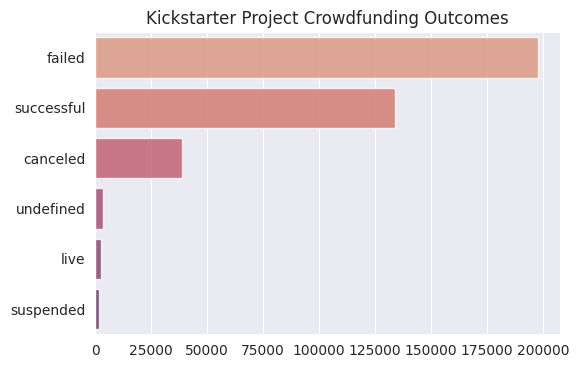

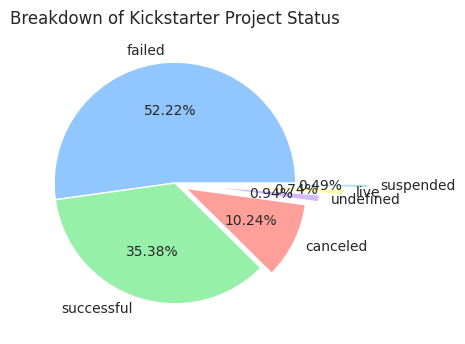

In [7]:
# Consult: https://www.kaggle.com/majickdave/kickstarter-success-classifier-0-685
import matplotlib.pyplot as plt
import seaborn as sns

#df['state'].hist()
sns.set_style('darkgrid')
outcome = df.state.value_counts()

x = outcome.values
y = outcome.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="flare", alpha=0.8)

plt.title('Kickstarter Project Crowdfunding Outcomes')
plt.show()

# since we are only interested in the projects that have state either being 'successful' or being 'failed'
# we can consider 'successful' and 'failed' to be the 2 class labels for the problem (target attribute)
# and we notice that the instances of the 2 class labels are moderately imbalanced 
# (so ‘accuracy’ might not be regarded as the optimal evaluation metric)

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4,.6]
df.state.value_counts().head(6).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Breakdown of Kickstarter Project Status')
plt.ylabel('')
plt.show()

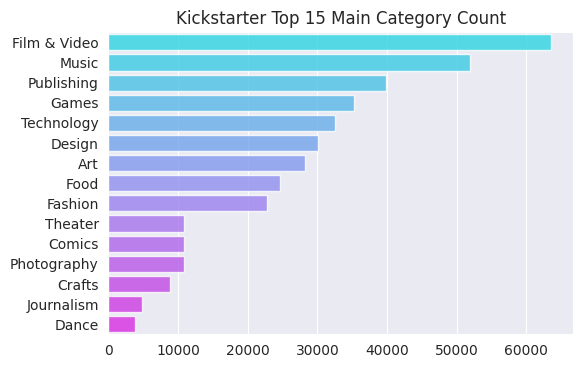

In [8]:
# Consult: https://www.kaggle.com/majickdave/kickstarter-success-classifier-0-685
import seaborn as sns

sns.set_style('darkgrid')
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="cool", alpha=0.8)

plt.title('Kickstarter Top 15 Main Category Count')
plt.show()
# see how many projects each 'main_category' includes


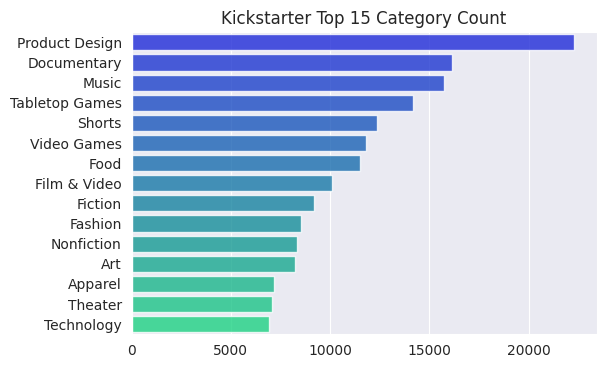

In [9]:
# see how many projects each 'category' includes
cats = df.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="winter", alpha=0.8)

plt.title('Kickstarter Top 15 Category Count')
plt.show()

# Note: Many of the top categories overlap with the top main_categories such as Music, Film, and Design

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
Name: country, dtype: int64


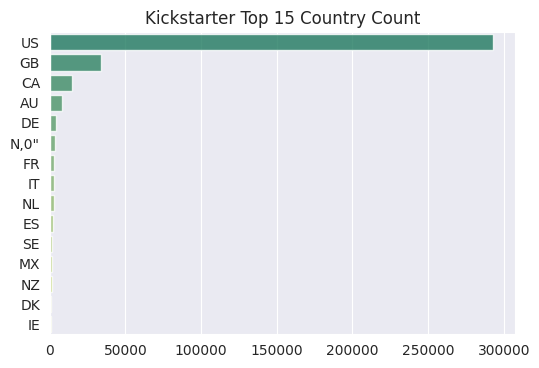

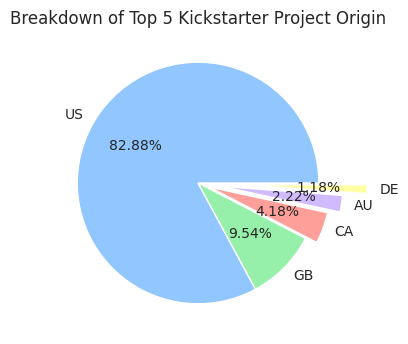

In [10]:
# see how many projects each 'country' includes
country = df.country.value_counts().head(15)
print(country)
x = country.values
y = country.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="summer", alpha=0.8)

plt.title('Kickstarter Top 15 Country Count')
plt.show()

# As we can see below, the projects from US dominate the KickStarters crowdfunding website. Even if we aggregate all the projects from countries other than US, 
# the number of projects from US is still larger than the number of projects from the aggregation
# In addition, the English speaking countries like US, Great Britain, Canada, and Australia are forming the top 4 of the project origins in KickStarter,
# which implies that this feature may not be very helpful for training the model to predict if a potential crowdfunding post will be successful or not,
# because most of the samples (more than 90%) are from the English speaking countries that tend to share similar cultures, meaning that this feature cannot provide 
# abundant information for the model's learning

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4,]
df.country.value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Breakdown of Top 5 Kickstarter Project Origin')
plt.ylabel('')
plt.show()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


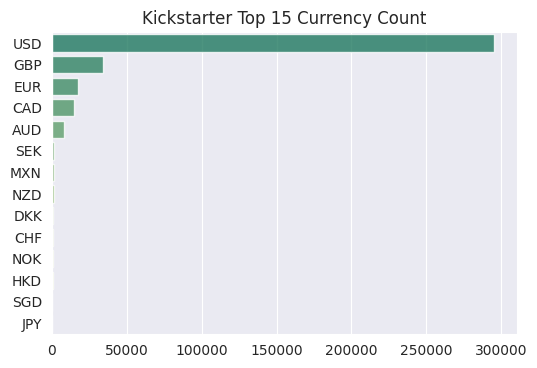

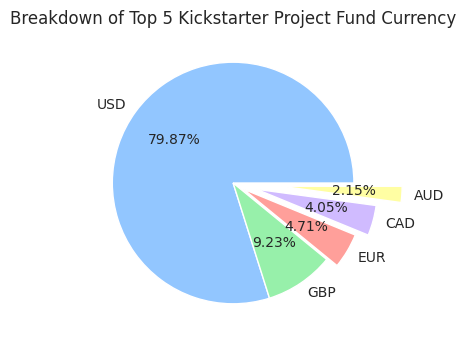

In [11]:
# see how many projects each 'currency' includes
curr = df.currency.value_counts().head(15)
print(curr)
x = curr.values
y = curr.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="summer", alpha=0.8)

plt.title('Kickstarter Top 15 Currency Count')
plt.show()

# As we can see below, the 'currency' feature should be highly correlated with the 'country' feature, because we can observe nearly identical numeric patterns/trends within the 2 features 
# For example, the projects requiring US dollar as funding currency still dominate the KickStarters crowdfunding website. Even if we aggregate all the projects requiring funding currencies other than US dollar, 
# the number of projects requiring US dollar as funding currency is still larger than the number of projects from the aggregation
# In addition, the currencies circulated in English speaking countries like US dollar (USD) in US, Great Britain Pound (GBP) in UK, Canadian Dollar (CAD) in Canada, and Australia Dollar (AUD) in Australia are in the top 5 of the project required funding currency in KickStarter.
# The only difference between this observed pattern with the pattern observed in 'country' feature is that the currencies circulated in European Union (EUR) is ranked the third in the top 5 of the project required funding currency. A possible explanantion for this observation is that 
# for European countries like Germany (DE), France(FR), and Netherlands(NL), they rank as the fifth, sixth, and seventh respectively in the top 15 of the project origins in KickStarter (as we can see from the graph 'Kickstarter Top 15 Country Count'),
# and those European countries all consider EUR as the sole currency in their countries to be used, so the number of projects requiring EUR as funding currency should be the summation of the projects with origin in European countries such as Germany (DE), France(FR), and Netherlands(NL), 
# thus it is reasonable to see that EUR is ranked the third in the top 5 of the project required funding currency as Euro can be used in multiple countries (while currencies like USD and GBP can only be used in their 'home countries').

# However, this 'currency' feature may still not be very helpful for training the model to predict if a potential crowdfunding post will be successful or not,
# because most of the samples (more than 90%) are still from the English speaking countries that tend to share similar cultures, meaning that this feature cannot provide 
# abundant information for the model's learning

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4,]
df.currency.value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Breakdown of Top 5 Kickstarter Project Fund Currency')
plt.ylabel('')
plt.show()

# Pre-processing

In [12]:
# select the projects that have state either being 'successful' or being 'failed' 
df = df.loc[df['state'].isin(['failed', 'successful'])]
# or df = df.loc[(df['state'] == 'failed') | (df['state'] == 'successful')]
# df = df.loc[df['state'].isin(['failed', 'successful'])]
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [13]:
# For above, we notice that the 'deadline' feature and the 'launched' time feature can be combined together to gain the 'number of active days' of a project as a new feature
# Hence, we can do the pre-processing of the date features here
# But before proceeding to the pre-processing of the date features, we must to check how many missing values are under the feature 'deadline' and 'launched'
# If there are just a few missing values under the 2 date features, we can just drop out the samples with the missing values by 'df[['launched','deadline']].dropna()'
df[['launched','deadline']].isnull().sum()

# Note: the reason why we check the number of the missing values instead of directly dropping out the samples with missing values is that if there is a large number of samples having missing value under the feature 'launched' or 'deadline',
# it may not be a wise approach to just drop out the samples with missing values as we can lose considerable amount of information&data

# Fortunately, as we can see below, there is no missing value under the feature 'deadline' and 'launched', so we can combine the two features without worrying about how to handle the samples with the missing value


launched    0
deadline    0
dtype: int64

In [14]:
df['launched'] = pd.to_datetime(df['launched']) # convert 'launched' time into datetime Series
df['launched'] = df['launched'].dt.date # we notice that the precision of the 'launched' time is 'second', while the precision of the 'deadline' time is 'day',
# so we can just convert the precision of the 'launched' time to 'days' as converting the precision of the 'deadline' time to 'second' is infeasible (need make assumptions about when the crowdfundings of the projects ends)
# and this kind of 'zoom_in' operation from 'days' into 'seconds' should not have a big impact on the prediction of the model

df['deadline'] = pd.to_datetime(df['deadline']) # convert 'deadline' time to datetime Series
df['deadline'] = df['deadline'].dt.date # convert the precision of the 'deadline' time to 'days' (ensure the data type matches with df['launched'], which is 'object' rather than 'datetime64')

#Creating a new feature named 'days_active' by simply subtracting the 'launched' date from the 'deadline' date
df['days_active'] = (df['deadline'] - df['launched']).dt.days # after subtracting the 'launched' date from the 'deadline' date, we drops out the unit 'days'
df['days_active'] # and the data type of the values under the feature 'days_active' is converted to 'int64' automatically


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

0         59
1         60
2         45
3         30
5         35
          ..
378654    30
378657    27
378658    46
378659    31
378660    28
Name: days_active, Length: 331675, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Statistics about the duration of projects on Kickstarter:
 count    331675.000000
mean         33.954875
std          12.713332
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: days_active, dtype: float64


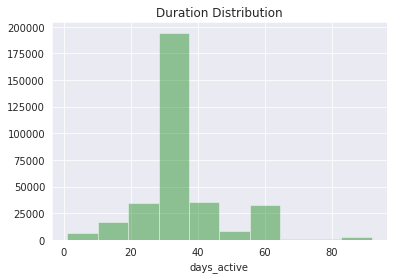

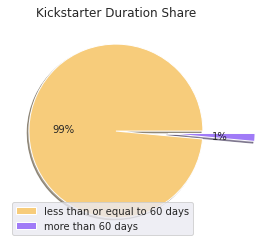

In [15]:
# Visualize the distribution of values under the 'days_active' feature
print('Statistics about the duration of projects on Kickstarter:\n', df['days_active'].describe())

sns.set_style('darkgrid')

sns.distplot(df['days_active'], kde=False, bins=10, color='green')

plt.title('Duration Distribution')
plt.show()

# we can see that nearly all the projects (around 99% of the projects) last less than 2 months (60 days) on Kickstarter

fig, ax = plt.subplots(1, 1)
(df['days_active'] <= 60).value_counts().plot.pie(autopct='%0.0f%%', 
                                             explode=[0,.6], 
                                             labels=None, 
                                             shadow=True, 
                                             colors=['#f7cc7b', '#a07bf7'])

plt.ylabel('')
plt.title('Kickstarter Duration Share')
plt.legend(['less than or equal to 60 days', 'more than 60 days'], loc=3)

plt.show()

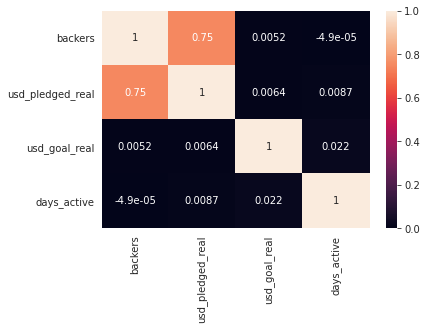

In [16]:
# See the correlations between features 'backers','usd_pledged_real', 'usd_goal_real', and 'days_active'
sns.heatmap(data=df[['backers','usd_pledged_real','usd_goal_real', 'days_active']].corr(), annot=True)
# We notice that the only one strong correlation within the 4 selected numeric features lies between the feature 'backers' and the feature 'usd_pledged_real',
# which is intuitive since the core idea of the crowdfunding is to gather as many individuals as possible and encourage them to invest as much as they can,
# which means that for the successful crowdfunding projects, there should be a linear relationship between the number of backers and the amount of money pledged, because a person must invest/contribute some money to the crowdfunding project to be counted as a backer,
# and usually the contribution/investment from a single investor is not considerable comparing to the total fund raised, meaning that the number of backers must be large when the amount of money pledged is also large (provided that the crowdfunding is successful).
# Unfortunately, the number of days a project lasted on the KickStarter website tends to be uncorrelated with either of the number of backers or the amount of money pledged



In [18]:
# As we can observe from the previous cell that has 'df.describe()', the minimal value for 'usd_goal_real' can be as low as '1.000000e-02'
# which is equal to 0.01$ and looks like a prank/mischief. Therefore, we may need to filter out some projects that are not 'earnest' 
# Also, since we consider the crowdfunding of a project to be successful as long as its pledged amount is larger than its goal amount, 
# some successful samples might be inherently biased as their goal amounts are set to be unreasonably low and so can be reached easily with just a few backers 
# Hence, some data scientists (ex: https://www.kaggle.com/jennifercrockett/kickstarter-success-prediction-wip) may choose to set a threshold (ex: 1000) on the 'usd_goal_real' to filter out those 'meaningless outliers'
# However, my thought is that for some meaningful projects that have low cost in nature, it is possible that the project initiator cannot gather a small amount of funding to proceed on his/her project
# For example, for people with low level of income, if they want to invent/sell some cheap but meaningful/useful widgets, it is reasonable for them to set their goal amount to be low, and the number of backers should be relatively large 
# Thus, I decide to perform 2 filtering operation:

# 1. Filter out the prank/mischief projects (if the 'usd_goal_real' is less than 100$, then it is likely to be a prank/mischief, as it is not convincing that anything useful/meaningful/original can be created with less than 100$)
index_drop = df[df['usd_goal_real'] < 100].index
df = df.drop(index_drop)

# 2. Filter out the projects that have both low goal amount (less than 1000$) and number of backers (less than 10)
index_drop = df[(df['usd_goal_real'] < 1000) & (df['backers'] < 10)].index  # get the index of the samples
df = df.drop(index_drop)

# As we can see below, comparing to simply setting a threshold for 'usd_goal_real' 
# we preserved around 19000 projects/samples that have a low goal amount (less than 1000$) but tend to be meaningful (as there are more than 10 backers supporting each of the projects)
df[(df['usd_goal_real'] < 1000) & (df['backers'] > 10)]


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_active
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23,701.66,successful,66,US,701.66,701.66,175.00,20
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29,112.38,successful,27,GB,167.70,160.60,142.91,30
64,1000243793,"""JurassicJurassix"" by The Guilt",Rock,Music,USD,2015-04-09,850.0,2015-02-23,485.00,failed,13,US,485.00,485.00,850.00,45
83,1000333671,Spiral Electric Skylab Recording,Rock,Music,USD,2015-02-26,500.0,2015-02-04,1540.00,successful,31,US,1540.00,1540.00,500.00,22
84,1000334074,The Locals Only Shirt,Fashion,Fashion,USD,2012-05-18,500.0,2012-05-01,754.82,successful,36,US,754.82,754.82,500.00,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378526,999291866,Sherlock Holmes Re-Imagined,Fiction,Publishing,GBP,2016-07-31,500.0,2016-06-28,1795.00,successful,53,GB,1121.07,2361.16,657.70,33
378543,999371383,"""The Bear"" an A2 Media Film",Fantasy,Film & Video,GBP,2014-11-27,250.0,2014-11-07,105.00,failed,13,GB,167.59,164.81,392.40,20
378544,999387668,How To Create a WordPress Website In 2017,Web,Technology,CAD,2017-09-14,500.0,2017-08-25,311.00,failed,16,CA,127.54,256.24,411.96,20
378610,999741441,CORPOREAL,Dance,Dance,USD,2013-05-15,500.0,2013-04-25,505.00,successful,14,US,505.00,505.00,500.00,20


In [19]:
# As mentioned before, the feature 'usd_pledged' is not as reliable as the feature 'usd_pledged_real', so we may need to drop this feature out to remove redundancy 

# Also, as the feature 'goal' is the crowdfunding goal amount in the project required currency, we may need to remove this feature as well, because 'goal' can be highly correlated with the feature 'usd_goal_real', 
# while 'usd_goal_real' should be preferred to ‘goal’ as the numeric patterns and trends within the ‘usd_goal_real’ can be better captured due to the uniform measurement unit

# Moreover, all the features about pledge such as 'pledged', 'usd_pledged', 'usd_pledged_real' should be removed, because our goal is to predict whether a potential project crowdfunding on Kickstarter will be successful or not before it is actually launched or posted in the Kickstarter website,
# meaning the amount of 'pledged' should be unknown (as the project is not even posted yet). 
# Additionally, if the features about pledge are not removed, the model performance will be perfect, because the model can simply compare the 'goal' feature and the 'pledged' feature and know if the project is funded successfully or not (if goal amount < pledge amount, then success) 
# The same idea can be applied to the 'backer' feature (the number of 'backers' should be unknown before posting the project)
# Also, the feature ID can be dropepd as it does not contribute any numeric meaning 

# The 'deadline' and 'launched' can also be removed as we have combined them into a feature 'days_active'

feature_drop = ['ID', 'deadline', 'launched', 'pledged', 'backers', 'goal',
              'usd pledged', 'usd_pledged_real']
df.drop(feature_drop, axis=1, inplace=True)

df

,name,category,main_category,currency,state,country,usd_goal_real,days_active
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,GB,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,US,30000.00,60
2,Where is Hank?,Narrative Film,Film & Video,USD,failed,US,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,US,5000.00,30
5,Monarch Espresso Bar,Restaurants,Food,USD,successful,US,50000.00,35
...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,failed,US,6500.00,30
378657,The Tribe,Narrative Film,Film & Video,USD,failed,US,1500.00,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,failed,US,15000.00,46
378659,BioDefense Education Kit,Technology,Technology,USD,failed,US,15000.00,31


In [20]:
# Convert the values under the target attribute 'state' to numeric class label
# 1 for 'successful', 0 for 'failed'
df['state'] = df['state'].apply(lambda x: 1 if x=="successful" else 0)
df

,name,category,main_category,currency,state,country,usd_goal_real,days_active
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,30000.00,60
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,5000.00,30
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,50000.00,35
...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,0,US,6500.00,30
378657,The Tribe,Narrative Film,Film & Video,USD,0,US,1500.00,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,0,US,15000.00,46
378659,BioDefense Education Kit,Technology,Technology,USD,0,US,15000.00,31


In [21]:
df.describe()

,state,usd_goal_real,days_active
count,307734.000000,3.077340e+05,307734.000000
mean,0.417432,4.470750e+04,34.271891
std,0.493136,1.151197e+06,12.596925
min,0.000000,1.000000e+02,1.000000
25%,0.000000,2.500000e+03,30.000000
50%,0.000000,6.000000e+03,30.000000
75%,1.000000,1.604364e+04,37.000000
max,1.000000,1.663614e+08,92.000000


In [22]:
# As we observe from the above table/dataframe, the feature 'category', 'main_category', 'country', and 'currency' should be great fit to the OneHotEncoder pre-processor 
# (as these 4 features fit the definition of 'category' precisely such as no built-in hierarchies within the categorical values)
# Hence, the pre-processing for these 4 features will be left to the following pipeline training structure

# Therefore, the only one left feature without pre-processing is 'name', and we decide to do 2 things with the feature 'name'
# 1. We can train a bidirectional RNN to predict if the crowdfunding of a project will be successful or not simply based on its project name
# 2. We can generate additional features from the 'name' feature to train the following models in the pipeline structure (ex: the length of the names, if certain punctuation is used in names, etc)
# At the end, we can combine the results/predictions generated by the 2 structurally different models together as the final output (This is an implementation of the ensemble method)

# So firstly, we need to drop/filter out the projects/samples whose 'name' attribute values are unknown (as we cannot train the bidirectional RNN on 'invalid' text data)
df = df[df['name'].notna()]
df

# Note: We will not drop any sample with missing value in features other than 'name' to ensure the sufficiency of the data, 
# Instead, we will use the 'IterativeImputer' to fill in missing values under the numeric features
# and use 'SimpleImputer' to fill in the missing values under the categorical features

,name,category,main_category,currency,state,country,usd_goal_real,days_active
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,30000.00,60
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,5000.00,30
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,50000.00,35
...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,0,US,6500.00,30
378657,The Tribe,Narrative Film,Film & Video,USD,0,US,1500.00,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,0,US,15000.00,46
378659,BioDefense Education Kit,Technology,Technology,USD,0,US,15000.00,31


In [23]:
# Generate additional features from the 'name' feature to train the following models in the pipeline structure 
# The first new feature 'name_len' containing the lengthes of the project names
df['name_len'] = df.name.str.len() 
df['name_len'].describe()
# We see that the minimal value of 'name_len' is 1, which means that some project names are as simple as only one character
# which might be a prank/mischelf/mistake 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    307731.000000
mean         34.510433
std          16.008715
min           1.000000
25%          21.000000
50%          34.000000
75%          48.000000
max          85.000000
Name: name_len, dtype: float64

In [24]:
# Consult: https://www.kaggle.com/majickdave/kickstarter-success-classifier-0-685, https://www.kaggle.com/srishti280992/kickstarter-project-classification-lgbm-70-3

# Note: All the boolean values are converted into the integer representations of the boolean values (ex: 1 stands for 'True', 0 stands for 'False')

# Those features shown in the project name should be attention catching, so we think adding such features into the training space should help the model to better classify the samples 
# The second new feature 'name_contain_exclam' containing the boolean value about if a project name contains a exclamation mark '!' or not
df['name_contain_exclam'] = df.name.str.contains('!').astype(int)

# The third new feature 'name_contain_question' containing the boolean value about if a project name contains a question mark '?' or not
df['name_contain_question'] = df.name.str.contains(r'\?').astype(int)

# Alternative way:  pd.get_dummies(df.name.str.contains('!'), drop_first=True)

# The fourth new feature 'name_is_tile' containing the boolean value about if a project name is title or not (True if all the words in a project name start with a upper case letter, AND the rest of the words are lower case letters)
df['name_is_title'] = df.name.str.istitle().astype(int)

# The fifth new feature 'name_is_upper' containing the boolean value about if a project name is uppercase or not (True if all the words in a project name are in upper case)
df['name_is_upper'] = df.name.str.isupper().astype(int)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,name,category,main_category,currency,state,country,usd_goal_real,days_active,name_len,name_contain_exclam,name_contain_question,name_is_title,name_is_upper
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,1533.95,59,31,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,30000.00,60,45,0,0,0,0
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,45000.00,45,14,0,1,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,5000.00,30,49,0,0,0,0
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,50000.00,35,20,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,0,US,6500.00,30,37,0,0,0,0
378657,The Tribe,Narrative Film,Film & Video,USD,0,US,1500.00,27,9,0,0,1,0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,0,US,15000.00,46,71,1,0,0,0
378659,BioDefense Education Kit,Technology,Technology,USD,0,US,15000.00,31,24,0,0,0,0


In [25]:
# The sixth new feature 'name_word' containing the numbers of words project names have
df['name_word'] = df.name.apply(lambda x: len(str(x).split(' ')))
df['name_word'].describe()
# We notice that more than 75% of the projects names are less than 10 words, which is not unexpected  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    307731.000000
mean          5.703917
std           2.792405
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          41.000000
Name: name_word, dtype: float64

# Split the dataset into the training, validation, and testing sets

In [26]:
from sklearn.model_selection import train_test_split

xy_train, xy_valid_test = train_test_split(
    df, test_size=0.5) # partition 50% of the data to be the training data

xy_valid, xy_test = train_test_split(
    xy_valid_test, test_size=0.6) # partition the 20% of the original data to be the validation data, and the final 30% of the original data to be the testing data
# Note: No overlap between the training set with the validation/testing sets
xy_train

,name,category,main_category,currency,state,country,usd_goal_real,days_active,name_len,name_contain_exclam,name_contain_question,name_is_title,name_is_upper,name_word
375419,When Wining is cool,Product Design,Design,USD,0,US,20000.00,7,19,0,0,0,0,4
70448,JahLah jewellery,Printing,Crafts,NOK,0,NO,6341.46,20,16,0,0,0,0,2
78420,Journey to Cure - a documentary film about hea...,Documentary,Film & Video,EUR,0,DE,32662.81,30,50,0,0,0,0,9
72317,Constructing the Building of the Future,Technology,Technology,USD,0,US,119000.00,30,39,0,0,0,0,6
57458,The Endless Summer Collection Exhibit,Documentary,Film & Video,USD,0,US,15000.00,30,37,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338467,Gluten Free Pizza Dough that doesn't SUCK,Food,Food,USD,0,US,19500.00,30,41,0,0,0,0,7
315682,Crowdfunder Match Game,Apps,Technology,USD,0,US,4750.00,30,22,0,0,1,0,3
117926,3D Battle Board for Star Trek Heroclix,Tabletop Games,Games,USD,0,US,10000.00,30,38,0,0,0,0,7
229044,Flat One - The World's Smartest Aquarium Lighting,Product Design,Design,USD,0,US,50000.00,45,49,0,0,0,0,8


# Building the pipeline for the classification models

In [55]:
# After generating new features from the 'name' feature, we can start building the pipeline for the training of the classification model 
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

numeric_features = ['usd_goal_real', 'days_active', 'name_len', 
                    'name_contain_exclam', 'name_contain_question', 'name_is_title', 'name_is_upper',
                   'name_word',]
numeric_transformer = Pipeline(steps=[
    ('iterative_imputer', IterativeImputer(max_iter=10, random_state=0)),
   # ('scaler', StandardScaler()), # we might not need to standardize the data, standardization is not needed as there are not many numeric features 
])

categorical_features = ['category', 'main_category', 'currency', 'country', 
                       ]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # replace all the missing values with the constant string 'missing' 
    # note the step names in different pipelines can be the same
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer transforms each of the selected data column (it will transform all the selected attributes in training and testing sets)
preprocessor = ColumnTransformer(  # apply categorical_transformer to categorical_features, and apply numeric_transformer to numeric_features
    transformers=[    # define list of transformer we want  
        ('num', numeric_transformer, numeric_features), # give a name 'num' to the numeric_transformer to pre-process the numeric_features
        ('cat', categorical_transformer, categorical_features)]) # give a name 'cat' to the categorical_transformer to pre-process the categorical_features

regr = Pipeline(steps=[('preprocessor', preprocessor), # the first step is do the pre-processing with using the pre-processor we defined above, and the pre-processor will process different features based on which type group it is in with using the corresponding transformer
                     ('normalizer', Normalizer()),
                       ('classifier', SVC( # the second step is choosing the search space (which model we will use)
                          random_state=1, max_iter=5000))])

# get the x,y training, validation, testing set
x_train = xy_train[[*numeric_features, *categorical_features]]
y_train = xy_train['state']

x_valid = xy_valid[[*numeric_features, *categorical_features]]
y_valid = xy_valid['state']

x_test = xy_test[[*numeric_features, *categorical_features]]
y_test = xy_test['state']

# we can extract the 'name' from the dataframe, and use it train the RNN
x_train

,usd_goal_real,days_active,name_len,name_contain_exclam,name_contain_question,name_is_title,name_is_upper,name_word,category,main_category,currency,country
375419,20000.00,7,19,0,0,0,0,4,Product Design,Design,USD,US
70448,6341.46,20,16,0,0,0,0,2,Printing,Crafts,NOK,NO
78420,32662.81,30,50,0,0,0,0,9,Documentary,Film & Video,EUR,DE
72317,119000.00,30,39,0,0,0,0,6,Technology,Technology,USD,US
57458,15000.00,30,37,0,0,1,0,5,Documentary,Film & Video,USD,US
...,...,...,...,...,...,...,...,...,...,...,...,...
338467,19500.00,30,41,0,0,0,0,7,Food,Food,USD,US
315682,4750.00,30,22,0,0,1,0,3,Apps,Technology,USD,US
117926,10000.00,30,38,0,0,0,0,7,Tabletop Games,Games,USD,US
229044,50000.00,45,49,0,0,0,0,8,Product Design,Design,USD,US


# Train the SVM model first
Incentive: Since the number of features in the original dataset is not large (though we have generated/added additional features from 'name'), we should use the Kernel functions to increase the feature space and make the dataset sparser. Thus, SVM should be a wise choice to try first as it implements Kernel functions conveniently and co-operates with them effectively 

In [56]:
param_svc = { # the range of hyper-parameters we want to search
    'preprocessor__num__iterative_imputer__max_iter': range(10,20),
    'classifier__kernel':['linear','poly', 'rbf', 'sigmoid','precomputed'], 
    'classifier__gamma': ['auto','scale'],
    'classifier__degree': range(1,10), # set degree for poly kernel use only, the default value is 3
    'classifier__coef0': range(0,10), #  only used in ‘poly’ and ‘sigmoid’, default value is 0,
    'classifier__tol': [1e-4,1e-3], # default value is 1e-3
    'classifier__decision_function_shape': ['ovr','ovo'], # default value is 'ovr', and 'ovo' cannot be used when is 'break_ties=True'
#    'classifier__break_ties': [True, False], # This parameter can only be 'True' when decision_function_shape='ovr', so the default value is 'False'. However, tuning this parameter is redundant as 'False' turns out to be the best parameter setting for 'break_ties' 
    'classifier__cache_size': [200,300], # Specify the size of the kernel cache size (MB), the default value is 200
    'normalizer__norm': ['l1','l2','max'],
}

random_search_svc = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    regr, param_svc, cv=2, verbose=3, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=5,random_state=1, 
    scoring='f1_micro') # we choose 'f1_micro' to be our primary scoring

random_search_svc.fit(x_train, y_train)
print('best score {}'.format(random_search_svc.best_score_))


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.0min finished


best score 0.6172878742772063


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [57]:
random_search_svc.best_params_

{'classifier__cache_size': 300,
 'classifier__coef0': 1,
 'classifier__decision_function_shape': 'ovo',
 'classifier__degree': 7,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'sigmoid',
 'classifier__tol': 0.001,
 'normalizer__norm': 'max',
 'preprocessor__num__iterative_imputer__max_iter': 17}

In [58]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_svc.best_estimator_.predict(x_valid)

print('SVM validation auc: ', roc_auc_score(y_valid, y_pred_valid))
print('SVM validation f1:  ', f1_score(y_valid, y_pred_valid, average='micro'))


SVM validation auc:  0.6144603163862749
SVM validation f1:   0.6128424268027167


In [59]:
# Run the model on the testing set 
from sklearn.metrics import roc_auc_score, f1_score
y_pred_test_svc = random_search_svc.best_estimator_.predict(x_test)

print('SVM testing auc: ', roc_auc_score(y_test, y_pred_test_svc))
print('SVM testing f1:  ', f1_score(y_test, y_pred_test_svc, average='micro'))

# As we can see below, SVM does not perform very well for this problem (Accoridng to the testing auc score, the prediction accuracy is slightly better than the random guessing)


SVM testing auc:  0.6170242598381511
SVM testing f1:   0.6154354419410745


# Train a Gradient Boost model and a XGBoosting model 
Incentive: These 2 models empirically perform well for usual binary classification task. And these 2 models can be combined with the results/predictions generated from the SVM and the bidirectional RNN (Implementation of the Ensemble method) to improve the accuracy of the final output/prediction

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
regr = Pipeline(steps=[('preprocessor', preprocessor), # the first step is do the pre-processing with using the pre-processor we defined above, and the pre-processor will process different features based on which type group it is in with using the corresponding transformer
#                     ('normalizer', Normalizer()), # the second step is to integrate regularization into the model building process to avoid overfitting 
                       ('classifier', GradientBoostingClassifier( # the third step is choosing the model architecture we will use
                         n_estimators=500,
                         ))])
param_gbc = {
    'preprocessor__num__iterative_imputer__max_iter': range(10,20),
    'classifier__max_depth': range(3,20), # default value for 'max_depth' is 3 
    'classifier__n_estimators': range(500,600), # default value for 'n_estimators' is 100, but Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance
}

random_search_gbc = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    regr, param_gbc, cv=None, verbose=1, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=1,random_state=1, 
    scoring='f1_micro') 

random_search_gbc.fit(x_train, y_train)
print('best score {}'.format(random_search_gbc.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


best score 0.7109739056965522


In [61]:
random_search_gbc.best_params_

{'classifier__max_depth': 3,
 'classifier__n_estimators': 523,
 'preprocessor__num__iterative_imputer__max_iter': 15}

In [62]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_gbc.best_estimator_.predict(x_valid)

print('Gradient Boosting validation auc: ', roc_auc_score(y_valid, y_pred_valid))
print('Gradient Boosting validation f1:  ', f1_score(y_valid, y_pred_valid, average='micro'))


Gradient Boosting validation auc:  0.6878830836174581
Gradient Boosting validation f1:   0.709680564130894


In [63]:
# Run the model on the testing set 
from sklearn.metrics import roc_auc_score, f1_score
y_pred_test_gbc = random_search_gbc.best_estimator_.predict(x_test)


print('Gradient Boosting testing auc: ', roc_auc_score(y_test, y_pred_test_gbc))
print('Gradient Boosting testing f1:  ', f1_score(y_test, y_pred_test_gbc, average='micro'))



Gradient Boosting testing auc:  0.6864682307415416
Gradient Boosting testing f1:   0.7095320623916811


## Training of the XGBoosting model

In [64]:
from xgboost.sklearn import XGBClassifier
regr = Pipeline(steps=[('preprocessor', preprocessor), # the first step is do the pre-processing with using the pre-processor we defined above, and the pre-processor will process different features based on which type group it is in with using the corresponding transformer
#                     ('normalizer', Normalizer()), # the second step is to integrate regularization into the model building process to avoid overfitting 
                       ('classifier', XGBClassifier( # the third step is choosing the model architecture we will use
                         seed=1, ))])
param_random = { # the range of hyper-parameters we want to search
    'preprocessor__num__iterative_imputer__max_iter': range(10,20),# The default value of 'max_iter' is 10, 
    'classifier__objective': ['binary:logistic', 'binary:hinge'], # hinge loss for binary classification makes predictions of 0 or 1, rather than producing probabilities.
    'classifier__max_depth': range(6,30), # The default value is 6, so we make it more flexible by extending the max_depth from the default value 6 to 30
    'classifier__n_estimators': range(500,600), # The default value is 100, so we make it more flexible by extending the number of estimators from the default value 100 to the range(200,400)
#    'classifier__colsample_bynode': np.arange(0.0, 1.1, 0.1), # the ranges of colsample_bynode, colsample_bylevel, and colsample_bytree are all (0,1], so we use np.arange() rather than range()
#    'classifier__colsample_bytree': np.arange(0.0, 1.1, 0.1), # np.arange(0.0, 1.1, 0.1) gives a array of float values from 0.0 to 1.0 with incrementing each element by 0.1 
#    'classifier__colsample_bylevel': np.arange(0.0, 1.1, 0.1), 
    'classifier__min_child_weight': range(0,10), # the larger the min_child_weight(default value is 1) and max_delta_step(default value is 0) values are, the more conservative the algorithm will be
#    'classifier__max_delta_step': range(0,10), # However, tuning the 'max_delta_step' tends to deteriorate the model's performance
#    'classifier__eta': np.arange(0.01,0.2,0.01), # adjust the learning rate, but the performance of the model is worse when we tuning the learning rate in a range that is above the default value 0.3, such as (0.4,1.0,0.1)
#    'classifier__scale_pos_weight': range(1,10), # we adjust the balance of positive and negative weights, the default value is 1, but tuning this parameter is not recommended by the system, and it did not improve the model's performance too
    'classifier__gamma': range(0,10), # default value of gamma is 0, and the larger gamma is, the more conservative the algorithm will be
#    'classifier__tree_method': ['auto','hist'], # the default value is 'auto', and it turns out that the default value will yield the best performance of the model in most of the situations 
#    'normalizer__norm': ['max'], # ,'l1','l2'], 'max' turns out to be the best settting for the regularization strategy, however, it later turns out that tuning the model's regularization parameter will be better than tuning this Normalizer in the model's pipeline
    'classifier__lambda': range(1,6), # L2 regularization term on weights, the default value is 1, and there is no need to extend further the range(1,6) as the best setting for the 'lambda' is always below 3
    'classifier__alpha': range(0,6), # L1 regularization term on weights, the default value is 0, and there is no need to extend further the range(0,6) as the best setting for the 'alpha' is always below 3
}

random_search_xgb = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    regr, param_random, cv=5, verbose=1, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=1,random_state=1, 
    scoring='f1_micro') 

random_search_xgb.fit(x_train, y_train)
print('best score {}'.format(random_search_xgb.best_score_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.6min finished


best score 0.7116043284697624


In [65]:
# Get feedbacks, see what are the best (hyper-)parameter settings in the search space we specified above
random_search_xgb.best_params_

{'classifier__alpha': 5,
 'classifier__gamma': 8,
 'classifier__lambda': 4,
 'classifier__max_depth': 23,
 'classifier__min_child_weight': 0,
 'classifier__n_estimators': 505,
 'classifier__objective': 'binary:logistic',
 'preprocessor__num__iterative_imputer__max_iter': 18}

In [66]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_xgb.best_estimator_.predict(x_valid)


print('XGBoosting validation auc: ', roc_auc_score(y_valid, y_pred_valid))
print('XGBoosting validation f1:  ', f1_score(y_valid, y_pred_valid, average='micro'))


XGBoosting validation auc:  0.6886673963818281
XGBoosting validation f1:   0.7090793877749976


In [67]:
# Run the model on the testing set 
from sklearn.metrics import roc_auc_score, f1_score
y_pred_test_xgb = random_search_xgb.best_estimator_.predict(x_test)


print('XGBoosting testing auc: ', roc_auc_score(y_test, y_pred_test_xgb))
print('XGBoosting testing f1:  ', f1_score(y_test, y_pred_test_xgb, average='micro'))

# As we can see below, for the 2 chosen evaluation metrics (f1 score and AUC), both of the XGBoosting model and the Gradient Boosting model have achieved scores around 70% 
# which can be considered as moderately accurate due to the nature of the problem (the information/features about each project are limited and are quite general, which creates more difficulties to the model to capture the underlying patterns/trends within the data to distinguish the successful crowdfunding projects from those failed ones)
# Moreover, from a logical perspective, a model with 90% accuracy rate or higher for this problem is logically impossible to gain, because if such model exists, then that means that the outcome of any Kickstarter crowdfunding activity can be adequately accurately predicted before being launched, which is likely to be unrealistic as the outcome of a crowdfunding activity should be based on a substantial number of unforeseen factors as well 
# For example, if a project related to 'face mask improvement' is introduced before 'Covid-19', its crowdfunding outcome might be predicted as 'fail' by the model, but the outcome will turn into 'successful' after the outbreak of 'COVID-19' due to the high demand for quality masks. However, based on the given training dataset of the model, the real-time information is not included in the model's training space, meaning that the model should not alternate its prediction.  
# Thus, the unlimited additional information outside the scope of the model should affect the outcomes of crowfunding activities substantially, indicating that a very reliable model for this problem should be technically impossible to acquire
# In addition, the XGBoosting model shares a very similar performance with the Gradient Boosting model (and both of them perform much better than the SVM model),


XGBoosting testing auc:  0.6889854818365053
XGBoosting testing f1:   0.710409445407279


# Train a Bidirectional RNN model
Incentive: This is inspired by a data scientist on Kaggle who attempted to use the natural language processing (BoW model) to predict if a project crowdfunding will be successful or not. Since we can try to use natural language processing to perform the prediction, then a RNN model should be considered as a better fit than BoW model to perform such prediction. In addition, from logical perspective, all the backers should be attracted by the names of the project initially, and once they are hooked by the names of the projects, they have the motivation to look more into the posting of the project and invest some money if they are really interested in. Thus, there should be certain relationships between the names of the projects and the success of the project crowdfunding

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
vocab_size = 5000 # set vocabulary size to 5000
max_len = 35     # change max_len for each 'name' value to be 35 (around 50% of project names are below this length)

tokenizer = Tokenizer(num_words=vocab_size,) 
tokenizer.fit_on_texts(xy_train.name) # only train the tokenizer on the training set 'name'

def _preprocess(texts):
  return pad_sequences(
      tokenizer.texts_to_sequences(texts),
      maxlen=max_len, 
      padding='post'
  )
x_train = _preprocess(xy_train.name)
y_train = xy_train.state

x_valid = _preprocess(xy_valid.name)
y_valid = xy_valid.state 

x_test = _preprocess(xy_test.name)
y_test = xy_test.state 

# tokenizer.get_config()

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, Embedding, Dense, LSTM, Bidirectional,Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

# Note: I redefine the f1 metric function in this cell of code in case I (or the TA) jump to run the GRU model code directly
# since Keras 2.0 metrics f1, precision, and recall have been removed, we have to code the f1 metric function for the evaluation of the model performance 
# Below is a custom f1 metric function retrieved from https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Creates the Bidirectional RNN model
bidir = Sequential()
bidir.add(Embedding(input_dim = vocab_size, output_dim = 100, input_length=max_len))
bidir.add(Bidirectional(LSTM(units=100,return_sequences=True)))
bidir.add(Bidirectional(LSTM(units=100,return_sequences=True)))
bidir.add(Bidirectional(LSTM(units=100,return_sequences=False)))
bidir.add(Dense(units=1, activation='sigmoid')) # the output layer of the bidirectional NN model
bidir.compile(
    optimizer=  tf.keras.optimizers.Adam(clipnorm=None),
    #tf.keras.optimizers.Adam(clipnorm=None),#tf.keras.optimizers.Adadelta(clipnorm=None),  #tf.keras.optimizers.SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),
    # start with 'clipnorm=None', try change optimizer to 'tf.keras.optimizers.Adadelta(clipnorm=None)'
    loss='binary_crossentropy',
    metrics=['AUC', f1, 'BinaryAccuracy'])
bidir.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 35, 100)           500000    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 35, 200)           160800    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 35, 200)           240800    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 1,142,601
Trainable params: 1,142,601
Non-trainable params: 0
_________________________________________________________________


In [48]:
# use Callback() method to save the Keras model or the model weights that yield the highest validation f1
checkpoint_filepath = '/checkpoint' # set the path to save the check_point model parameters
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( # define the Callback() function
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_f1', 
    mode='max',
    save_best_only=True)

history = bidir.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=1024,
                    validation_data=(x_valid, y_valid),
                    verbose=1,
                    callbacks=[model_checkpoint_callback],  # implement Callback() in conjunction with '.fit()' to save a model or weights (in a checkpoint file) that yield the highest validation f1 score
                    # class_weight={0: 2.0, 1: 1.0,}, assign different weights to different class labels since the dataset is highly imbalanced 
                   )

# put/load the weights into the bidirectional NN model
bidir.load_weights(checkpoint_filepath)

Epoch 1/15
151/151 [==============================] - 24s 112ms/step - loss: 0.6598 - auc: 0.5963 - f1: 0.2269 - binary_accuracy: 0.6112 - val_loss: 0.6306 - val_auc: 0.6764 - val_f1: 0.4899 - val_binary_accuracy: 0.6470
Epoch 2/15
151/151 [==============================] - 15s 101ms/step - loss: 0.6135 - auc: 0.7036 - f1: 0.5325 - binary_accuracy: 0.6649 - val_loss: 0.6311 - val_auc: 0.6794 - val_f1: 0.4890 - val_binary_accuracy: 0.6502
Epoch 3/15
151/151 [==============================] - 15s 102ms/step - loss: 0.6033 - auc: 0.7182 - f1: 0.5518 - binary_accuracy: 0.6753 - val_loss: 0.6311 - val_auc: 0.6783 - val_f1: 0.5284 - val_binary_accuracy: 0.6473
Epoch 4/15
151/151 [==============================] - 16s 103ms/step - loss: 0.5957 - auc: 0.7288 - f1: 0.5685 - binary_accuracy: 0.6806 - val_loss: 0.6320 - val_auc: 0.6757 - val_f1: 0.5162 - val_binary_accuracy: 0.6468
Epoch 5/15
151/151 [==============================] - 16s 105ms/step - loss: 0.5895 - auc: 0.7363 - f1: 0.5740 - bin

In [49]:
# evaluate the RNN model on the validation set 
#bidir.evaluate(x_valid, y_valid)
from sklearn.metrics import  f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def predict_class(_dataset):
  classes = bidir.predict(_dataset) > 0.5
  return np.squeeze(classes * 1) 

y_predict_valid = predict_class(x_valid)
print('Bidirectional RNN validation auc: ', roc_auc_score(y_valid, y_predict_valid))
print('Bidirectional RNN validation f1:  ', f1_score(y_valid, y_predict_valid, average='micro'))


Bidirectional RNN validation auc:  0.6227336166099988
Bidirectional RNN validation f1:   0.6472882071946187


In [50]:
# evaluate the RNN model on the testing set 

y_predict_test_rnn = predict_class(x_test)
print('Bidirectional RNN testing auc: ', roc_auc_score(y_test, y_predict_test_rnn))
print('Bidirectional RNN testing f1:  ', f1_score(y_test, y_predict_test_rnn, average='micro'))

# As we can see below, the testing evaluation metric scores generated by the bidirectional RNN are around 60%, 
# which means that the bidirectional RNN model that only accepts the 'name' attribute for training can yield predictions that have similar accuracies with the ones generated by the SVM model that is trained on all the other non-target attributes such as the project origin country, and the goals of funding amount.
# This observation indicates and confirms the previous assumption/reasoning that there should be certain relationships between the names of the projects and the success of the project crowdfunding.


Bidirectional RNN testing auc:  0.622945364569703
Bidirectional RNN testing f1:   0.6477036395147314


# Ensemble Method: Combine the predictions generated by the models 

In [76]:
# use the weighted average function as the aggregation method to combine the predictions generated by the models
voted  = np.average([y_pred_test_svc ,y_pred_test_xgb, y_pred_test_gbc, y_predict_test_rnn], axis=0, weights=[0.2,0.3,0.3,0.2])
# The SVM and RNN models that only produce evaluation metric scores around 60% are assigned with smaller weights than the ones assigned to Gradient Boosting and XGBoosting models that produce evaluation metric scores around 70%
# The weights assigned to the 4 models (SVM, Gradient Boosting, XGBoosting, Bidirectional RNN) are 0.2 , 0.3, 0.3, 0.2 respectively, indicating their relevant importance to the final output/prediction of the class labels

# argument to auc evaluation metric must be float value
print('Ensemble/Final testing auc: ', roc_auc_score(y_test, voted))

# argument to f1_score can be integer value 
voted = np.round(voted)
print('Ensemble/Final testing f1:  ', f1_score(y_test, voted, average='micro'))

# As we can see from the output below, both of the AUC score and the F1 score have improved slightly due to the implementation of the Ensemble method, showing that the final accuracy of the 'model pipeline' is around 71% 



Ensemble/Final testing auc:  0.7454896824186618
Ensemble/Final testing f1:   0.7132474003466205


# Trained LGBM model for fun (yielded a similar model performance with XGBoosting model with using much less amount of time)

In [34]:
#LGBM classifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
regr = Pipeline(steps=[('preprocessor', preprocessor), # the first step is do the pre-processing with using the pre-processor we defined above, and the pre-processor will process different features based on which type group it is in with using the corresponding transformer
#                     ('normalizer', Normalizer()), # the second step is to integrate regularization into the model building process to avoid overfitting 
                       ('classifier', LGBMClassifier( # the third step is choosing the model architecture we will use
                         seed=1, ))]) # set the number of classes, num_class=3
param_random = { # the range of hyper-parameters we want to search
    'preprocessor__num__iterative_imputer__max_iter': range(10,20),# The default value of 'max_iter' is 10, 
    'classifier__objective': ['binary'], # hinge loss for binary classification makes predictions of 0 or 1, rather than producing probabilities.
    'classifier__max_depth': range(6,30), # The default value is 6, so we make it more flexible by extending the max_depth from the default value 6 to 30
    'classifier__n_estimators': range(500,600), # The default value is 100, so we make it more flexible by extending the number of estimators from the default value 100 to the range(200,400)
#    'classifier__colsample_bynode': np.arange(0.0, 1.1, 0.1), # the ranges of colsample_bynode, colsample_bylevel, and colsample_bytree are all (0,1], so we use np.arange() rather than range()
    'classifier__colsample_bytree': np.arange(0.0, 1.1, 0.1), # np.arange(0.0, 1.1, 0.1) gives a array of float values from 0.0 to 1.0 with incrementing each element by 0.1 
#    'classifier__colsample_bylevel': np.arange(0.0, 1.1, 0.1), 
    'classifier__min_child_weight': range(0,10), # the larger the min_child_weight(default value is 1) and max_delta_step(default value is 0) values are, the more conservative the algorithm will be
#    'classifier__max_delta_step': range(0,10), # However, tuning the 'max_delta_step' tends to deteriorate the model's performance
    'classifier__eta': np.arange(0.01,0.2,0.01), # adjust the learning rate, but the performance of the model is worse when we tuning the learning rate in a range that is above the default value 0.3, such as (0.4,1.0,0.1)
#    'classifier__scale_pos_weight': range(1,10), # we adjust the balance of positive and negative weights, the default value is 1, but tuning this parameter is not recommended by the system, and it did not improve the model's performance too
    'classifier__gamma': range(0,10), # default value of gamma is 0, and the larger gamma is, the more conservative the algorithm will be
#    'classifier__tree_method': ['auto','hist'], # the default value is 'auto', and it turns out that the default value will yield the best performance of the model in most of the situations 
#    'normalizer__norm': ['max'], # ,'l1','l2'], 'max' turns out to be the best settting for the regularization strategy, however, it later turns out that tuning the model's regularization parameter will be better than tuning this Normalizer in the model's pipeline
    'classifier__lambda': range(1,6), # L2 regularization term on weights, the default value is 1, and there is no need to extend further the range(1,6) as the best setting for the 'lambda' is always below 3
    'classifier__alpha': range(0,6), # L1 regularization term on weights, the default value is 0, and there is no need to extend further the range(0,6) as the best setting for the 'alpha' is always below 3
}

random_search_light = RandomizedSearchCV( # pass the model pipeline and the ranges of (hyper-)parameters we want to search as arguments to RandomizedSearchCV()
    regr, param_random, cv=5, verbose=1, n_jobs=-1,  # cv=5 means we have 5 folds for the CV, n_jobs = -1 means using all CPU processors
    n_iter=10,random_state=1,  # 'n_iter'=35 means that 35 parameter settings are randomly sampled, and so we will have 35 models that will go through the 5-fold cross-validation
    scoring='f1_micro') 

random_search_light.fit(x_train, y_train)
print('best score {}'.format(random_search_light.best_score_))



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


best score 0.7145159717934553


In [35]:
# Get feedbacks, see what are the best (hyper-)parameter settings in the search space we specified above
random_search_light.best_params_

{'classifier__alpha': 3,
 'classifier__colsample_bytree': 0.4,
 'classifier__eta': 0.12,
 'classifier__gamma': 8,
 'classifier__lambda': 2,
 'classifier__max_depth': 6,
 'classifier__min_child_weight': 3,
 'classifier__n_estimators': 543,
 'classifier__objective': 'binary',
 'preprocessor__num__iterative_imputer__max_iter': 15}

In [36]:
# Run the model on the validation set to see the performance for tuning
from sklearn.metrics import roc_auc_score, f1_score
y_pred_valid = random_search_light.best_estimator_.predict(x_valid)


print('XGBoosting validation auc: ', roc_auc_score(y_valid, y_pred_valid))
print('XGBoosting validation f1:  ', f1_score(y_valid, y_pred_valid, average='micro'))

XGBoosting validation auc:  0.6922851558120717
XGBoosting validation f1:   0.7126377018815195


In [38]:
y_pred_test_lgbm = random_search_light.best_estimator_.predict(x_test)
print(' testing auc: ', roc_auc_score(y_test, y_pred_test_lgbm))
print(' testing f1:  ', f1_score(y_test, y_pred_test_lgbm, average='micro'))

 testing auc:  0.6918997549956664
 testing f1:   0.713117417677643
